## **Preposessing Dataset Training**

---

Dataset tweet berasal dari penelitian: [Emotion dataset from Indonesian public opinion](https://www.sciencedirect.com/science/article/pii/S2352340922006588?via%3Dihub)

Dataset                              : [link Dataset](https://github.com/Ricco48/Emotion-Dataset-from-Indonesian-Public-Opinion)

## Installing Package

In [2226]:
!pip install sastrawi
!pip install emoji

## Import Library

In [2227]:
import pandas as pd
import numpy
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from nltk import tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display, HTML

# Load Data Train

Penelitian : "Emotion Dataset from Indonesia public opinion" 

In [2228]:
anger_data = pd.read_csv("../Dataset/Training/Training_Raw/AngerData.csv", on_bad_lines="skip", delimiter="\t")
anger_data

,tweet,label
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger
4,dih lu yg nyebelin bego,Anger
...,...,...
1125,"dan yg emng belom tau banyak lah tentang dunia ini gitu. tapi gw ngerasa sedih dan marah aja, gatau deh rasanya campur aduk. ini aja ngetik sambil...",Anger
1126,"aa kesel bgt anying. dia sudah di bandaraa, gift gue blm siap. ya allah sedih bgt gue uda gbsa nepatin janji buat meet up dari desember trs harini...",Anger
1127,"ini segala keresahan gua udah mau ilang nihh, pokoknya pikiran udah mulai enak deh tapi entah kenapa fyp gua isinya cuplikan film layangan kusut, ...",Anger
1128,"gue pernah datang lebih awal, sebelum waktu nya malah terus malah dibilang kek gini (kurang lebih) saking jombolnya jadi punya banyak waktu luang ...",Anger


In [2229]:
fear_data = pd.read_csv("../Dataset/Training/Training_Raw/FearData.csv", on_bad_lines="skip", delimiter="\t")
fear_data

,tweet,label
0,trs barusan dia reach out aku trs minta tolong buat bantu project dia yaallaah aaaa jujur agak takut pressure tp ok gapapa,Fear
1,sumpah ini receh bgt dan not bts related. cm jujur w magang padet bgt dikasih project mayan banyak. trs kemaren ada senior gd presentasi gt dan ke...,Fear
2,ragu utk bisa beli barang tu karn harganya bisa buat cicilan bulanan,Fear
3,bisa gak sih langsung tanggal 11 aja gausah ada tanggal 10 gua takut banget mana 2 hari lagi,Fear
4,iya kaan yg lain suka pada coba pd gpp tp tetep takut wkwk,Fear
...,...,...
906,bgt! sepi dan serem,Fear
907,"sepi aneh kayak ada yg perhatiin tapi gk ada sapa""",Fear
908,joonyoung.. paling merinding sama sedih jadi 1,Fear
909,"mau nonton kukira kau rumah awokaowkwk, tapi takut terlalu sedih jadi kalut",Fear


In [2230]:
joy_data = pd.read_csv("../Dataset/Training/Training_Raw/JoyData.csv", on_bad_lines="skip", delimiter="\t")
joy_data

,tweet,label
0,dipeluk enak nih,Joy
1,masih dongg wkkwkwtar klo gk semangat gk bisa bucinin bebep2 aku,Joy
2,semangat dan bertambah kuatlah kalian frp_natsud_ frp_lucyheart frp_wendy ~,Joy
3,jangan lupa sarapann semangat buat hari inii ayang semoga harimu menyenangkan !!,Joy
4,aw ikut seneng semangat ya kuliahnya!,Joy
...,...,...
1270,yaaaa rumah sepi. mari kita party wakwakk,Joy
1271,"seru tau prenjon zer kdng sedih kdng baper, seru kan",Joy
1272,aahh iyaa bgtt hazaa!! kek tbtb bawaannya mellow bgtt yaa semangaatt hazaa!! semoga mellow2 kzl sedih gajelasnya cpt2 ilang ya,Joy
1273,"kadrun kroco sih cuman dapet nasbung jk ada order demo. tp kini lg sepi order jd kelaparan mknya ngaco meracau jadinya, wkwk ngakak",Joy


In [2231]:
love_data = pd.read_csv("../Dataset/Training/Training_Raw/LoveData.csv", on_bad_lines="skip", delimiter="\t")
love_data

,tweet,label
0,"suka banget kata2, ""kebenaran hanya menurut selera kalian saja.""",Love
1,"hanse mode anak rumahan gini tuh aku suka banget wkwk pake kaos terus bawahnya celana model apapun itu, misal jeans atau training tuh fav banget s...",Love
2,"ya kali ngejar ngejar cinta, ngejar tahajjud aja kadang suka telat",Love
3,"selamat pagi sender! sana avail nih pas hari valentine, nanti disayang-sayang sama sana, dia orangnya manja dan suka manjain balik terus juga suka...",Love
4,sopaa!! cuz akuu suka banget jurusan tari di sana aku sering ngikutin daily school nya anak sopaa dan itu asik asik bangett mereka juga suka ada e...,Love
...,...,...
755,ngeliat teaser wonpil jadi sedih anjir apaan sih sebel tapi sayang,Love
756,"lae ku sayang jangan sedih ya, bentar lagu kau menyusul junjungan mu yang kau bela mati matian kemarin sayang kamu",Love
757,"lockey tetep harus support secret number juga, dan bia nerima member baru juga. iya kita sedih, tp kepikiran ga si sama eonni"" secret number kita ...",Love
758,"ku tetap membelamu meski kau jahat, karna ku cinta padamu",Love


In [2232]:
neutral_data = pd.read_csv("../Dataset/Training/Training_Raw/NeutralData.csv", on_bad_lines="skip", delimiter="\t")
neutral_data

,tweet,label
0,pengabdian yang terpuji meskipun terlihat biasa,Neutral
1,baru saja mengirim foto,Neutral
2,apa kabar dunia twitter ? masihkah selucu dan seabsurd dulu ?,Neutral
3,yah gimana sih yang yaudah susul aku dulu kita sarapan bubur di tempat biasa,Neutral
4,saja ka dorg suro beli medium 2 set,Neutral
...,...,...
1996,"karena tau rasa kesepian, manusia akan menjadi lebih baik. karena tau rasa sedih, manusia akan menjadi kuat. (princess tutu)",Neutral
1997,"yang terbaik adalah percaya dan berlindung hanya pada tuhan, bukan pada manusia. karena akan ada kecewa jika terlalu percaya pada manusia.",Neutral
1998,sahabat adalah mereka yg tahu bahwa ada sedih di matamu ketika seluruh dunia percaya dengan senyum di wajahmu.,Neutral
1999,"terkadang, bukan karena dusta, kamu membenci seseorang, tapi karena sedih menerima kenyataan bahwa dia tak bisa lagi kamu percaya",Neutral


In [2233]:
sad_data = pd.read_csv("../Dataset/Training/Training_Raw/SadData.csv", on_bad_lines="skip", delimiter="\t")
sad_data

,tweet,label
0,"akibat dari telat bangun, anak ikut bangun dan dapur dan rumah tidak kepegang sampe jam segini. sedih karena berantakan, tp gppa dehh penting anak...",Sad
1,sepi,Sad
2,sedih dah,Sad
3,"sedih emg kalo ditinggal temen ngebucin, sedih ga ada waktu main sm temen, sedih krna pengen ngebucin jg",Sad
4,sedih bener niih club ya,Sad
...,...,...
998,pagi saat seisi semesta sujud pada zat yg acap lupa kau sebut sebab kesombongan yg membalut pagi ketika angin berbisik lirih saat malaikat rahmat ...,Sad
999,"meski engkau yg pergi, meski engkau yg meninggalkan. meski engkau hilang,, tp engkau ttp bagiku msh ada si sampingku sprt biasanya,, maaf saat ini...",Sad
1000,udah biasa kalah dan tersakiti,Sad
1001,"apakabar ku?. apakah baik-baik saja,, tidak, aku sedang tidak baik fikiranku sedang tak menentu",Sad


Penelitian : IndoNLU

In [2234]:
tambahan_data1 = pd.read_csv("../Dataset/Training/Training_Raw/test_preprocess.csv", on_bad_lines="skip", delimiter=",")
tambahan_data1

,label,tweet
0,Love,"Pixy ini kok lama-lama gemesim yaaaa. Setelah jatuh cinta sama lip cream nya, kayak nya bakal jatih cinta sama yang lain. Huft"
1,Fear,Penyakit hepatitis B 100x lebih infeksius dari HIV/AIDS Duhh serem! Dan belum ada obatnya.
2,Fear,Gw lebih khawatir lg kalo Ahok jd jurkamnya Jokowi bro. Nemo movement malah berbalik jd ikon punya Jokowi. Persis kejadian 212 yg jd panggung Jkw
3,Anger,"Kemerdekaan adalah hak segala bangsa ...( Kec Yahudi,Kurdi , Catalonia , Koptik ) sbgmn kita menutup mata terhadap Penjajahan Yaman dan Qatar.Arti..."
4,Joy,"Selamat pak resmi jadi bapak, sekedar saran sering sering si jagoan dikasih dengar lagu YNWA sama tonton pertandingan Liverpool... Biar ngerti se..."
...,...,...
435,Sad,"Ramadhan udah masuk hari yang ke-20 aja. tapi saya? masih gini gini aja, ga ada perubahan. padahal gatau taun depan saya masih ada apa ngga buat k..."
436,Sad,"kalo gue sik emang abis kehilangan seseorang yang deket, ya bisa dibilang cuman tahap bangunin sahur-zone lah, ahhhhhhh sial, tayo tayo!!! bener a..."
437,Fear,"aku dong malem ini checkup darah,, ok warning untuk tensi dan kolesterol ..terus kenapa pusingnya ya dok ??spertinya gejala maag ..oh gitu tp aku ..."
438,Anger,Dan besok musti pagi2 tangsel-bogor.. Dan (lagi) gabisa ngtap pake emoney etc. Dan (lagi) harus pake antri beli tiket kertas DAN (LAGI) BESOK SENIN


In [2235]:
tambahan_data2 = pd.read_csv("../Dataset/Training/Training_Raw/train_preprocess.csv", on_bad_lines="skip", delimiter=",")
tambahan_data2

,label,tweet
0,Joy,Ini adalah hal yang paling membahagiakan saat biasku foto bersama ELF #ReturnOfTheLittlePrince #JoyHeeChulDay
1,Anger,"Dari pertama menduduki bangku jabatan anda, rakyat belum pernah mendengar dan melihat hasil kerja dan prestasi nyata yang anda berikan semasa m..."
2,Fear,"yaudah kalo emang belum berani potong rambut pendek ya nanti"" aja kalo emang udah yakin dan bisa nyaman Selamat beristirahat, jangan lupa berdoa ..."
3,Fear,"Jadi semalam, gw rekap, eh intinya yg gw usahain kerja ternyata zero samsek.. Presentasi jam 16.00, ku baru grasak grusuk jam 13.23. Jiaaaaaaann"
4,Anger,"temen2 masa kecil yang turned out being asshole itu kalo cewe jadi ukhti2 hijrah kalo cowo jadi abdi negara, rasanya semua statement ku di sosmed ..."
...,...,...
3516,Fear,"Bcs doi w anak pelayaran, tp emg beneran sih ditinggal 5 bulan gt, ketemu cm 3 hari dri 5 bulan itu Parahnya atasannya yg udh beristri main cewe..."
3517,Anger,"Sekali , dua kali , tiga kali , lama2 bosan juga ya... krn berulang dilubang yg sama... lubang yg sengaja dibuat sendiri , spy terkesan orang lain..."
3518,Anger,"Sampaikan juga informasi kegiatan dana desa, jangan hanya kirim hastag dan mantion saja"
3519,Fear,Aku takut tulisan ini terbaca di saat kamu nggak ngerti apa yang aku rasain. Aku takut tulisan ini terbaca dan kamu marahin aku. Aku takut.


In [2236]:
tambahan_data3 = pd.read_csv("../Dataset/Training/Training_Raw/valid_preprocess.csv", on_bad_lines="skip", delimiter=",")
tambahan_data3

,label,tweet
0,Anger,jaringannya mati ya? Tidak bisa dibuka mobile jkn. Saya mau ke puskesmes trus piye mau tunjukkan kartu elektoniknya? #kecewa
1,Anger,"It's like a circle of stupidity. Atlit gak diurusin, duitnya buat bebenah ini itu biar atlit yang dateng dari luar negri bisa nyaman disini tp atl..."
2,Anger,"Koq Ngabalin di sebut tokoh, gak salah tuh, hidungnya tambah gede ntar, toko sorban kali ya."
3,Joy,Selamat Siang Sahabat Pos. Kiriman tsb sudah diterima ya sahabat. Terima kasih telah mempercayakan dan menggunakan layanan kami :) ^FD
4,Joy,"Di hari ini, yap tepat di tanggal 23 juli dimana mungkin di hari ini gua merasa sangatsangat special.. Makasih mamih, makasih uwa, makasih kakek, ..."
...,...,...
435,Anger,Mekanisme pemilihan direksi dan komisarisnya dgn cara gmna ya? Sontoloyo khan uang rakyat dipake buat gaji BOD dan BOC yg model gini....
436,Fear,Ngasih tehaer ke keponakan. Baju dua biji celana sebiji koko sestel sama jaket sebiji udah lebih setengah juta. Pesan: kalo lo belum sanggup secar...
437,Love,HAHAHA BODO AMAT DEEHHH YG PENTING DI VIDEO INI SE FRAME SAMA DANIELSAYANG BANGEET DONGG SM DIAAA DAN MEREKA
438,Sad,"Langsung mewek baca thread ini, keren maksimal usaha semua orang dalam misi penyelamatan, sampai harus ada yang gugur."


Penelitian : "Classification on Indonesian Twitter Dataset"

In [2237]:
tambahan_data4 = pd.read_csv("../Dataset/Training/Training_Raw/Twitter_Emotion_Dataset.csv", on_bad_lines="skip", delimiter=",")
tambahan_data4

,label,tweet
0,Anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn A..."
1,Anger,"Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. ..."
2,Joy,"Kepingin gudeg mbarek Bu hj. Amad Foto dari google, sengaja, biar teman-teman jg membayangkannya. Berbagi itu indah."
3,Anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Pengaturan wilayah tgg jwb dan wwnang gub.Tng Abng soal rumit,sejak gub2 , trdahulu.Skrg sedng dibenahi,..."
4,Joy,"Sharing pengalaman aja, kemarin jam 18.00 batalin tiket di stasiun pasar senen, lancar, antrian tidak terlalu rame,15 menitan dan beress semua! Mu..."
...,...,...
4396,Love,"Tahukah kamu, bahwa saat itu papa memejamkan matanya dan menahan gejolak dan batinnya. Bahwa papa sangat ingin mengikuti keinginanmu tapu lagi-lag..."
4397,Fear,Sulitnya menetapkan Calon Wapresnya Jokowi di Pilpres 2019 salah satunya disebabkan gemuknya partai koalisi yang mengusung petahana. Sehingga sika...
4398,Anger,"5. masa depannya nggak jelas. lha iya, gimana mau jelas coba? lulusan seni, bisanya cuma nari, mau kerja apa? nari-nari doang. berapa sih, penghas..."
4399,Joy,"dulu beneran ada mahasiswa Teknik UI nembak pacarnya pas sahur di Kukusan Teknik Depok, diliput kru Katakan Cinta (dan belum pacaran mereka). Sek..."


Penelitian : https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/blob/master/Twitter_Emotion_Dataset.csv

In [2238]:
tambahan_data5 = pd.read_csv("../Dataset/Training/not_preposessing3.csv", on_bad_lines="skip", delimiter=",")
tambahan_data5

,Unnamed: 0,label,tweet
0,0,Love,Keren kando
1,1,Fear,"Grace Natalie kemudian membandingkan hasil temuan tim riset PSI, antara era kepemimpinan Susilo Bambang Yudhoyono (…"
2,2,Love,"Mantap ,,,,"
3,3,Sad,Uda pernah. Ga dapet apa apaaaah
4,4,Fear,"[USERNAME] Paling parah sih gabisa sama skali liat yg bolong2, totol2(?), bintik2, polkadot2 semacam itu lah. Bisa nangis sampe pusing karena tern..."
...,...,...,...
11409,11409,Joy,Mahasiswa HI Nilai Ridho Berhasil Majukan Lampung #KlikRMOL #ridho
11410,11410,Love,Retweeted fakhru (@fakherh123):\n\nPemuda lintas agama #Kupang Nusa Tenggara Timur (NTT) dukung TGB Sebagai Presiden…
11411,11411,Joy,"@Anarqhy1 @PBB2019 Mari bersama bebenah om,\n\n#PBB2019SemangkinBesar"
11412,11412,Love,"@MRomahurmuziy Selalu ada jalan keluar terbaik dalam setiap masalah, dg berikhtiar dan terus berdoa kita akan menem…"


berasal dari penelitian : https://github.com/kmyafi/Emotion-Analysis-Bahasa/blob/main/Dataset%20Babak%20Penyisihan.csv

In [2239]:
tambahan_data6 = pd.read_csv("../Dataset/Training/Dataset Babak Penyisihan.csv", on_bad_lines="skip", delimiter=",")
tambahan_data6

,label,tweet
0,Fear,Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist & ayat Al-Qur'an DAN grup WA lingkungan paroki gereja.... Serem kalo salah...
1,Joy,"Hepibesdey canteeeekk panjang umur, jadi pribadi yang jauh lebih baik, semoga apa yang di cita-citakan terwujud dan langgeng sama"
2,Joy,"Jumat lalu nonton inih! Selain tertarik settingnya yg di Jogja, aku penasaran stlh baca bahaya laten acak2 rambut di review Kak Dan emang bagus b..."
3,Joy,Nyante dulu.. Sruput kopi biar tambah bijak...
4,Love,"Happy annyversarry yg pertama kalinya .. Trsrah org mau blng apa, aku gk pdli.. Ini yg aku rasain slma 1blan.. Aku cukup bhagia sm km smuanya baik..."
...,...,...
4148,Anger,sini berobat sama saya ini ngantri dokter saja sudah kek mau ngantri sembako panjang bener~
4149,Joy,Selamat pagi generasi Tik Tok yang kadang kepalanya suka minta digetok! Bukan pengen cekcok tapi mau ajakin kamu seru-seru an yang berfaedah di #...
4150,Love,"Salah satu sahabat terbaik! Teman, kakak, inspirasi untuk selalu berbuat baik dan melihat dengan prasangka baik serta selalu berbagi. Love you mabes"
4151,Anger,Gila kok ada ya perempuan pikirannya malah nyinyirin. Banyak lho kasus korban sexual harassment ga berani speak up yang berakhir bunuh diri.


In [2240]:
checking = pd.read_csv("../Dataset/Training/check.csv", on_bad_lines="skip", delimiter=",")
checking

,Unnamed: 0,label,tweet
0,1,Anger,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!"
1,2,Fear,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com"
2,3,Sad,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.
3,4,Joy,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak"
4,5,Fear,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus."
5,6,Love,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345"
6,7,Sad,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!
7,8,Neutral,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?"
8,9,Joy,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,10,Neutral,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?


Gabungkan semua data menjadi satu dataframe.

In [2241]:
train_data = pd.concat([anger_data,fear_data,joy_data,love_data,neutral_data,sad_data,tambahan_data1,tambahan_data2,tambahan_data3,tambahan_data4,tambahan_data5,tambahan_data6])

In [2242]:
#train_data = pd.concat([checking])

Menghilangkan Data yang Duplikat dan Kosong (Jika Ada)

In [2243]:
train_data.dropna(subset=['tweet'], inplace=True)
train_data.drop_duplicates(subset='tweet', inplace=True)

In [2244]:
train_data.reset_index(inplace=True,drop=True)
train_data

,tweet,label,Unnamed: 0
0,pagi2 udah di buat emosi :),Anger,NaN
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,NaN
2,dah lah emosi mulu liat emyu,Anger,NaN
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,NaN
4,dih lu yg nyebelin bego,Anger,NaN
...,...,...,...
19551,"Lg sibuk ngedit konten di ruang tunggu tapi kok sekumpulan nenek"" didepan sy seru banget yah. Mereka lg ghibah ternyata. Hal ini menunjukkan bahwa...",Joy,NaN
19552,Momen di mana kamu merasa seperti amarahmu hampir melebihi batas yang bisa kamu kendalikan. 😤🌊 #AlmostUncontrollable,Anger,NaN
19553,Momen di mana perasaan takut membuatmu terjebak dalam siklus pikiran negatif yang tak terkendali. 🔄😰 #CycleOfFear,Fear,NaN
19554,"Ketika kamu merasa seperti kamu bisa melakukan segala hal bersama seseorang yang kamu cintai, itu adalah kekuatan cinta yang luar biasa. 💪👫 #Unity...",Love,NaN


In [2245]:
# Jika ada kolom 'label' yang menunjukkan jenis emosi
print(train_data['label'].value_counts())


label
Joy        4244
Anger      3698
Sad        3351
Fear       3255
Love       3022
Neutral    1986
Name: count, dtype: int64


In [2246]:
train_data.to_csv('../Dataset/Training/not_preposessing22.csv')

# EDA

Sebelum melakukan preprossing pada data, akan dilakukan eda secara singkat untuk melihat tipe data dan null values pada data.

In [2247]:
eda_data = train_data.copy()

## Null Values

In [2248]:
print("Null Values:")
eda_data.isna().sum()

Null Values:


tweet             0
label             0
Unnamed: 0    12178
dtype: int64

## Data Types

In [2249]:
print("Data Types:")
eda_data.info()

Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19556 entries, 0 to 19555
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       19556 non-null  object 
 1   label       19556 non-null  object 
 2   Unnamed: 0  7378 non-null   float64
dtypes: float64(1), object(2)
memory usage: 458.5+ KB


In [2250]:
eda_data.head()


,tweet,label,Unnamed: 0
0,pagi2 udah di buat emosi :),Anger,NaN
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,NaN
2,dah lah emosi mulu liat emyu,Anger,NaN
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,NaN
4,dih lu yg nyebelin bego,Anger,NaN


## Label Proportion

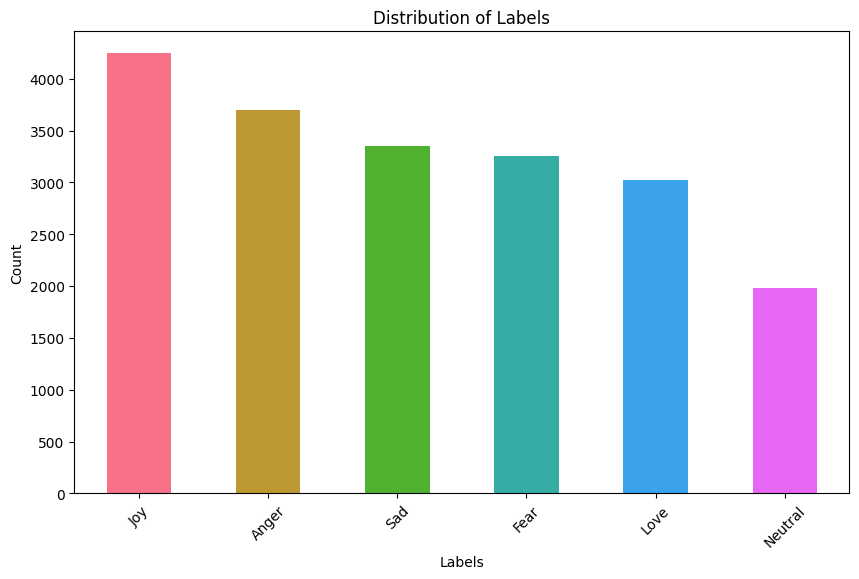

In [2251]:
label_counts = eda_data["label"].value_counts()

# Generate a color palette with a unique color for each label
palette = sns.color_palette("husl", len(label_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color=palette)
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Netral memiliki lebih banyak data dibandingkan label yang lain. 

## Data Distribution

In [2252]:
eda_data['Length'] = eda_data['tweet'].str.len()
eda_data.head(10)

,tweet,label,Unnamed: 0,Length
0,pagi2 udah di buat emosi :),Anger,NaN,27
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,NaN,184
2,dah lah emosi mulu liat emyu,Anger,NaN,28
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,NaN,277
4,dih lu yg nyebelin bego,Anger,NaN,23
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,NaN,211
6,drama abg tolol,Anger,NaN,15
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,NaN,87
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,NaN,58
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,NaN,136


In [2253]:
print(f"Rata-rata panjang karakter tweet : {eda_data['Length'].mean():.2f}")

Rata-rata panjang karakter tweet : 130.94


In [2254]:
print(f"Jumlah panjang karakter tweet  : {eda_data['Length'].sum():.2f}")

Jumlah panjang karakter tweet  : 2560650.00


In [2255]:
def word_count(tweet):
    tweet_list = tweet.split()
    return len(tweet_list)

In [2256]:
eda_data['Word_count'] = eda_data['tweet'].apply(word_count)
eda_data.head(10)

,tweet,label,Unnamed: 0,Length,Word_count
0,pagi2 udah di buat emosi :),Anger,NaN,27,6
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,NaN,184,25
2,dah lah emosi mulu liat emyu,Anger,NaN,28,6
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,NaN,277,40
4,dih lu yg nyebelin bego,Anger,NaN,23,5
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,NaN,211,37
6,drama abg tolol,Anger,NaN,15,3
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,NaN,87,13
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,NaN,58,9
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,NaN,136,21


In [2257]:
print(f"Jumlah kata : {eda_data['Word_count'].sum():.2f}")

Jumlah kata : 394556.00


In [2258]:
print(f"Rata-rata jumlah kata : {eda_data['Word_count'].mean():.2f}")

Rata-rata jumlah kata : 20.18


In [2259]:
eda_data['mean_word_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(word) for word in rev.split()]))
eda_data.head(10)

,tweet,label,Unnamed: 0,Length,Word_count,mean_word_length
0,pagi2 udah di buat emosi :),Anger,NaN,27,6,3.666667
1,"kok stabilitas negara, memange 10 thn negara tdk aman, bahkan sby menyuburkan ormas2 radikal, intoleran, teroris, yg berafiliasi ke partai tertent...",Anger,NaN,184,25,6.400000
2,dah lah emosi mulu liat emyu,Anger,NaN,28,6,3.833333
3,"aib? bodoh benar! sebelum kata aib itu muncul, terlebih dahulu sudah ada tindakan. yakni kekejian! jangan kau sembunyikan caramu menelaah masalah....",Anger,NaN,277,40,5.950000
4,dih lu yg nyebelin bego,Anger,NaN,23,5,3.800000
5,"asli malu maluin org indo tolol yg rep latah ""cilukba"" pake huruf hijaiyah sm ""ngntd"" sama ganti huruf t pake salib, ada tiktok filipin lewat fyp ...",Anger,NaN,211,37,4.729730
6,drama abg tolol,Anger,NaN,15,3,4.333333
7,masih emosi sih sama katla kemarin. mana keterangannya gini aja. ((hasil mengaci)) kzl.,Anger,NaN,87,13,5.769231
8,"bangsat tribute no.1, bencana no.2 mau ngalahin ini keknya",Anger,NaN,58,9,5.555556
9,pengen pergi jauh terus teriak sambil nangis sekencang kencangnya nanti balik kalo gue udah lupa segalanya wkwj kn tolol mustahil banget,Anger,NaN,136,21,5.523810


In [2260]:
eda_data['mean_sent_length'] = eda_data['tweet'].map(lambda rev: numpy.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
eda_data.head(10)

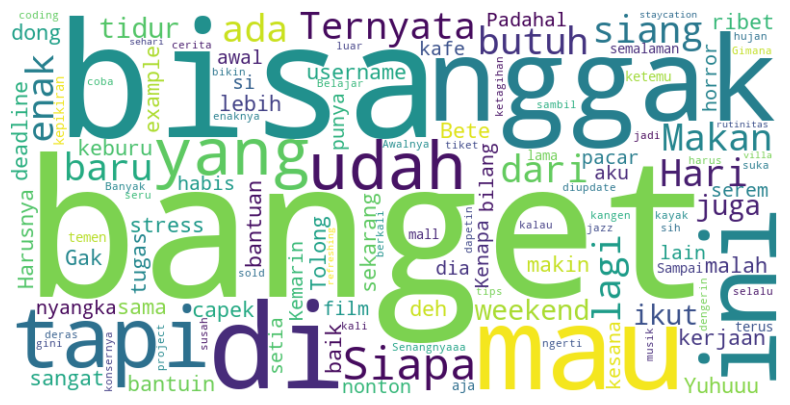

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua teks dalam satu string
all_tweets = ' '.join(eda_data['tweet'])

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Preprocessing

In [ ]:
import copy

train_data_copy = copy.deepcopy(train_data)


## 01. Case Folding

### a. Lowercase

In [ ]:
def tweet_lowercase(tweet):
    tweet = tweet.lower()
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 999 µs


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 @username harusnya bisa lebih baik, tapi malah makin ribet!"
1,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com"
2,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_lowercase)

CPU times: total: 0 ns
Wall time: 1.01 ms


## 02. Cleansing

### a. Menghapus username

In [ ]:
import re

In [ ]:
def tweet_delete_username(tweet):

    userPattern = r'@\w+'
    

    tweet = re.sub(userPattern, '', tweet)
    
    return tweet


In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 1.04 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 @username harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_username)

CPU times: total: 0 ns
Wall time: 0 ns


### b. Menghapus url

In [ ]:
def tweet_delete_url(tweet):
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*|url)" #Pola ngehapus url
    tweet = re.sub(urlPattern, '', tweet)
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 1.01 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline! http://example.com","yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_url)

CPU times: total: 0 ns
Wall time: 0 ns


### c. Menghapus kelebihan huruf

In [ ]:
def tweet_delete_extra_letters(tweet):
    sequencePattern   = r'([A-Za-z])\1{2,}' 
    seqReplacePattern = r'\1' #Pola ngereplace yang kelebihan huruf tiga kali
    tweet = re.sub(sequencePattern, seqReplacePattern, tweet)
    
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnyaaa! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_letters)

CPU times: total: 0 ns
Wall time: 1.47 ms


### d. Menghapus new line dan new text

In [ ]:
def tweet_delete_new_line_new_text(tweet):
    tweet = re.sub(r'\\[nt]', ' ', tweet)
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 997 µs


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_new_line_new_text)

CPU times: total: 0 ns
Wall time: 0 ns


### e. Menghapus Hastag

In [ ]:
def tweet_remove_hashtags(tweet):
    hashtag= r'#\w+'
    tweet = re.sub(hashtag, '', tweet)
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})

pd.options.display.max_colwidth = 150

display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩 #makan #enak","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_remove_hashtags)

CPU times: total: 0 ns
Wall time: 0 ns


### f. Menghapus angka

In [ ]:
def tweet_delete_number(tweet):
    number = r'\d+' 
    tweet = re.sub(number, '', tweet)
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!","hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!"
1,"yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!","yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!"
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩","makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩"
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.","kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus."
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget! 12345","baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget!"
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?","lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?"
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project."
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_number)

CPU times: total: 0 ns
Wall time: 1.01 ms


### g. Menghapus tanda baca

In [ ]:
def tweet_delete_punctuation(tweet):
    punctuationPattern = r'[^\w\s]' 
    tweet = re.sub(punctuationPattern, ' ', tweet)
    
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"hari ini sangat 😤! bete banget sama kerjaan, deh!!! 😒😒😒 harusnya bisa lebih baik, tapi malah makin ribet!",hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,"yuhu~ ada yang bisa bantuin tugas nggak? butuh bantuan sekarang! tolong dong, keburu deadline!",yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka! ternyata si dia 💔 udah punya pacar lain. 😢😢 kenapa nggak bilang dari awal? padahal aku setia banget.,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget
3,"makan siang di kafe baru 🍔🍟, enak banget! mau lagi kesana weekend ini. siapa mau ikut? 🤩",makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut
4,"kemarin habis nonton film horror yang serem banget 😱😱! sampai nggak bisa tidur semalaman, kepikiran terus.",kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus
5,"baru aja ketemu temen lama di mall. senangnya! 😍💕 banyak cerita yang harus diupdate, kangen banget!",baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget
6,gimana sih bisa dapetin tiket konsernya? 😭😭 udah coba berkali-kali tapi selalu sold out. ada tips nggak?!!!!,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak
7,"lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. siapa suka kayak gini juga?",lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga
8,"belajar coding ternyata seru juga 💻! awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.",belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa. 🏡✨ butuh banget refreshing dari rutinitas sehari-hari. siapa ikut?,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_punctuation)

CPU times: total: 0 ns
Wall time: 0 ns


### h. Menghapus Extra Spasi

In [ ]:
def tweet_delete_extra_space(tweet):
    tweet = re.sub(r"\s+", " ", tweet)
    tweet = re.sub(r"^\s+|\s+$", "", tweet)
    
    return tweet

In [ ]:
%%time
train_data["tweet"] = train_data["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 0 ns


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget
3,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut
4,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus
5,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget
6,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga
8,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut


In [ ]:
%%time
train_data_copy["tweet"] = train_data_copy["tweet"].apply(tweet_delete_extra_space)

CPU times: total: 0 ns
Wall time: 0 ns


## 03. Normalization

### Import Kamus

In [ ]:
kamus_singkatan = pd.read_csv("../Dataset/kamus_singkatan.csv",names=["kata_gaul","kata_asal"],delimiter=";")
kamus_singkatan

,kata_gaul,kata_asal
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,ad,ada
4,aer,air
...,...,...
1306,yup,ya
1307,yups,ya
1308,yupz,ya
1309,ywdh,ya sudah


In [ ]:
def create_kamus():
      kamus = {}
      for i in range(len(kamus_singkatan)):
          kamus[kamus_singkatan["kata_gaul"][i]]=kamus_singkatan["kata_asal"][i].lower().strip()
      return kamus

In [ ]:
kamus = create_kamus()
kamus

{'aamiin': 'amin',
 'adek': 'adik',
 'adlh': 'adalah',
 'ad': 'ada',
 'aer': 'air',
 'aiskrim': 'es krim',
 'aj': 'saja',
 'aja': 'saja',
 'ajah': 'saja',
 'ajalah': 'saja',
 'aje': 'saja',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan',
 'ama': 'sama',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur',
 'ane': 'saya',
 'anget': 'hangat',
 'anjeng': 'anjing',
 'ank': 'anak',
 'apah': 'apa',
 'aph': 'apa',
 'apo': 'apa',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya',
 'asek': 'asik',
 'ati2': 'hati-hati',
 'atit': 'sakit',
 'atu': 'satu',
 'atw': 'atau',
 'ayang': 'sayang',
 'ayuk': 'ayo',
 'babang': 'abang',
 'bae': 'baik',
 'bais': 'habis',
 'bakalan': 'akan',
 'bales': 'balas',
 'bandingin': 'bandingkan',
 'banget': 'sekali',
 'bangett': 'sangat',
 'banyakin': 'perbanyak',
 'barengan': 'bersamaan',
 'baryaw': 'sabar ya',
 'baso': 'bakso',
 'bay': 'selamat tinggal',
 'bbrp': 'beberapa',

In [ ]:
def tweet_replace_contractions(tweet):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(contraction) for contraction in kamus.keys()) + r')\b')
    tweet = pattern.sub(lambda x: kamus[x.group()], tweet)
    return tweet

In [ ]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 14.3 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari ini sangat bete banget sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari ini sangat sebal sekali sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet
1,yuhu ada yang bisa bantuin tugas nggak butuh bantuan sekarang tolong dong keburu deadline,yuhu ada yang bisa bantuin tugas tidak butuh bantuan sekarang tolong dong keburu deadline
2,gak nyangka ternyata si dia udah punya pacar lain kenapa nggak bilang dari awal padahal aku setia banget,tidak sangka ternyata si dia sudah punya pacar lain kenapa tidak bilang dari awal padahal saya setia sekali
3,makan siang di kafe baru enak banget mau lagi kesana weekend ini siapa mau ikut,makan siang di kafe baru enak sekali mau lagi kesana weekend ini siapa mau ikut
4,kemarin habis nonton film horror yang serem banget sampai nggak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror yang seram sekali sampai tidak bisa tidur semalaman kepikiran terus
5,baru aja ketemu temen lama di mall senangnya banyak cerita yang harus diupdate kangen banget,baru saja ketemu teman lama di mall senangnya banyak cerita yang harus diupdate kangen sekali
6,gimana sih bisa dapetin tiket konsernya udah coba berkali kali tapi selalu sold out ada tips nggak,gimana sih bisa mendapatkan tiket konsernya sudah coba berkali kali tapi selalu sold out ada tips tidak
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka kayak gini juga,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka mirip gini juga
8,belajar coding ternyata seru juga awalnya susah tapi kalau udah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru juga awalnya susah tapi kalau sudah ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh banget refreshing dari rutinitas sehari hari siapa ikut,weekend ini mau staycation di villa butuh sekali refreshing dari rutinitas sehari hari siapa ikut


In [ ]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_replace_contractions(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 18.3 ms


## 04. Stopword Removal

Library : Sastrawi

In [ ]:
def tweet_stopwords_removal(tweet):
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tweet = stopword.remove(tweet)
    return tweet

In [ ]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 4.02 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari ini sangat sebal sekali sama kerjaan deh harusnya bisa lebih baik tapi malah makin ribet,hari sangat sebal sekali sama kerjaan deh harusnya lebih baik malah makin ribet
1,yuhu ada yang bisa bantuin tugas tidak butuh bantuan sekarang tolong dong keburu deadline,yuhu yang bantuin tugas butuh bantuan sekarang dong keburu deadline
2,tidak sangka ternyata si dia sudah punya pacar lain kenapa tidak bilang dari awal padahal saya setia sekali,sangka ternyata si sudah punya pacar kenapa bilang awal padahal setia sekali
3,makan siang di kafe baru enak sekali mau lagi kesana weekend ini siapa mau ikut,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut
4,kemarin habis nonton film horror yang seram sekali sampai tidak bisa tidur semalaman kepikiran terus,kemarin habis nonton film horror seram sekali tidak tidur semalaman kepikiran terus
5,baru saja ketemu teman lama di mall senangnya banyak cerita yang harus diupdate kangen sekali,baru ketemu teman lama mall senangnya banyak cerita harus diupdate kangen sekali
6,gimana sih bisa mendapatkan tiket konsernya sudah coba berkali kali tapi selalu sold out ada tips tidak,gimana sih mendapatkan tiket konsernya coba berkali kali selalu sold out tips
7,lagi hujan deras di luar enaknya tidur siang sambil dengerin musik jazz siapa suka mirip gini juga,hujan deras luar enaknya tidur siang dengerin musik jazz siapa suka mirip gini
8,belajar coding ternyata seru juga awalnya susah tapi kalau sudah ngerti jadi ketagihan mau bikin project,belajar coding ternyata seru awalnya susah kalau ngerti jadi ketagihan mau bikin project
9,weekend ini mau staycation di villa butuh sekali refreshing dari rutinitas sehari hari siapa ikut,weekend mau staycation villa butuh sekali refreshing rutinitas sehari hari siapa ikut


In [ ]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tweet_stopwords_removal(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 2 ms


## 05. Stemming

Library Satrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [ ]:
def stemming_sentences(tweet):
    stemmer = factory.create_stemmer()

    if isinstance(tweet, list):
        return [stemmer.stem(i) for i in tweet]
    else:
        return stemmer.stem(tweet)


In [ ]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 5.77 s
Wall time: 7.79 s


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari sangat sebal sekali sama kerjaan deh harusnya lebih baik malah makin ribet,hari sangat sebal sekali sama kerja deh harus lebih baik malah makin ribet
1,yuhu yang bantuin tugas butuh bantuan sekarang dong keburu deadline,yuhu yang bantuin tugas butuh bantu sekarang dong keburu deadline
2,sangka ternyata si sudah punya pacar kenapa bilang awal padahal setia sekali,sangka nyata si sudah punya pacar kenapa bilang awal padahal setia sekali
3,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut
4,kemarin habis nonton film horror seram sekali tidak tidur semalaman kepikiran terus,kemarin habis nonton film horror seram sekali tidak tidur malam pikir terus
5,baru ketemu teman lama mall senangnya banyak cerita harus diupdate kangen sekali,baru ketemu teman lama mall senang banyak cerita harus diupdate kangen sekali
6,gimana sih mendapatkan tiket konsernya coba berkali kali selalu sold out tips,gimana sih dapat tiket konser coba kali kali selalu sold out tips
7,hujan deras luar enaknya tidur siang dengerin musik jazz siapa suka mirip gini,hujan deras luar enak tidur siang dengerin musik jazz siapa suka mirip gin
8,belajar coding ternyata seru awalnya susah kalau ngerti jadi ketagihan mau bikin project,ajar coding nyata seru awal susah kalau ngerti jadi tagih mau bikin project
9,weekend mau staycation villa butuh sekali refreshing rutinitas sehari hari siapa ikut,weekend mau staycation villa butuh sekali refreshing rutinitas hari hari siapa ikut


In [ ]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = stemming_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 5.53 s
Wall time: 8.22 s


## 06. Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenization_sentences(tweet):
    if isinstance(tweet, list):
        tokenized_tweet = []
        for word in tweet:
            tokens = word_tokenize(word)
            tokenized_tweet.extend(tokens)
        return tokenized_tweet
    else:
        return word_tokenize(tweet)

In [ ]:
%%time
for i in range(len(train_data)):
    print(f"Baris ke-{i}")
    kalimat = train_data["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 3 ms


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': train_data_copy['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,hari sangat sebal sekali sama kerja deh harus lebih baik malah makin ribet,"[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet]"
1,yuhu yang bantuin tugas butuh bantu sekarang dong keburu deadline,"[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline]"
2,sangka nyata si sudah punya pacar kenapa bilang awal padahal setia sekali,"[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali]"
3,makan siang kafe baru enak sekali mau kesana weekend siapa mau ikut,"[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut]"
4,kemarin habis nonton film horror seram sekali tidak tidur malam pikir terus,"[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus]"
5,baru ketemu teman lama mall senang banyak cerita harus diupdate kangen sekali,"[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali]"
6,gimana sih dapat tiket konser coba kali kali selalu sold out tips,"[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips]"
7,hujan deras luar enak tidur siang dengerin musik jazz siapa suka mirip gin,"[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin]"
8,ajar coding nyata seru awal susah kalau ngerti jadi tagih mau bikin project,"[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project]"
9,weekend mau staycation villa butuh sekali refreshing rutinitas hari hari siapa ikut,"[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut]"


In [ ]:
%%time
for i in range(len(train_data_copy)):
    print(f"Baris ke-{i}")
    kalimat = train_data_copy["tweet"][i]
    kalimat = tokenization_sentences(kalimat)
    train_data_copy.at[i, "tweet"] = kalimat

Baris ke-0
Baris ke-1
Baris ke-2
Baris ke-3
Baris ke-4
Baris ke-5
Baris ke-6
Baris ke-7
Baris ke-8
Baris ke-9
CPU times: total: 0 ns
Wall time: 3.02 ms


## Saving Preposessing

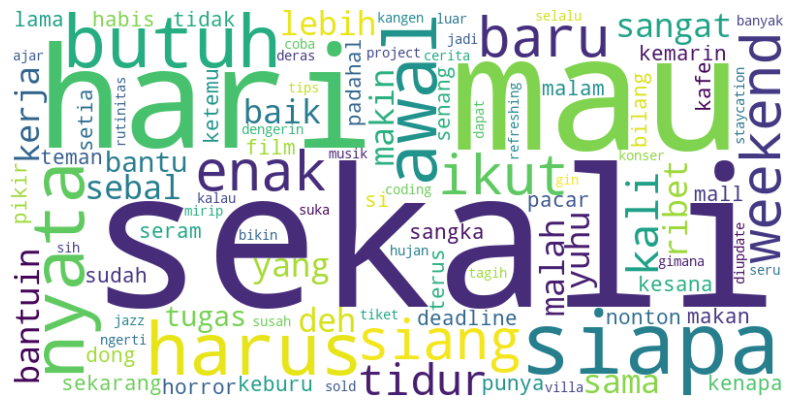

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called train_data with a column "tweet"
# containing the tweets

# Convert lists of tweets into a single string
all_tweets = ' '.join([tweet for sublist in train_data['tweet'] for tweet in sublist])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tweets)

# Display the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
comparison_df = pd.DataFrame({
    'Before ': eda_data['tweet'],
    'After ': train_data['tweet']
})


pd.options.display.max_colwidth = 150


display(HTML(comparison_df.head(10).to_html()))

,Before,After
0,"Hari ini sangat 😤! Bete banget sama kerjaan, deh!!! 😒😒😒 @username Harusnya bisa lebih baik, tapi malah makin ribet!","[hari, sangat, sebal, sekali, sama, kerja, deh, harus, lebih, baik, malah, makin, ribet]"
1,"Yuhuuu~ ada yang bisa bantuin tugas nggak? #capek #stress butuh bantuan sekarang! Tolong dong, keburu deadline! http://example.com","[yuhu, yang, bantuin, tugas, butuh, bantu, sekarang, dong, keburu, deadline]"
2,Gak nyangka! Ternyata si dia 💔 udah punya pacar lain. 😢😢 Kenapa nggak bilang dari awal? Padahal aku setia banget.,"[sangka, nyata, si, sudah, punya, pacar, kenapa, bilang, awal, padahal, setia, sekali]"
3,"Makan siang di kafe baru 🍔🍟, enak banget! Mau lagi kesana weekend ini. Siapa mau ikut? 🤩 #makan #enak","[makan, siang, kafe, baru, enak, sekali, mau, kesana, weekend, siapa, mau, ikut]"
4,"Kemarin habis nonton film horror yang serem banget 😱😱! Sampai nggak bisa tidur semalaman, kepikiran terus.","[kemarin, habis, nonton, film, horror, seram, sekali, tidak, tidur, malam, pikir, terus]"
5,"Baru aja ketemu temen lama di mall. Senangnyaaa! 😍💕 Banyak cerita yang harus diupdate, kangen banget! 12345","[baru, ketemu, teman, lama, mall, senang, banyak, cerita, harus, diupdate, kangen, sekali]"
6,Gimana sih bisa dapetin tiket konsernya? 😭😭 Udah coba berkali-kali tapi selalu sold out. Ada tips nggak?!!!!,"[gimana, sih, dapat, tiket, konser, coba, kali, kali, selalu, sold, out, tips]"
7,"Lagi hujan deras di luar ☔️, enaknya tidur siang sambil dengerin musik jazz. Siapa suka kayak gini juga?","[hujan, deras, luar, enak, tidur, siang, dengerin, musik, jazz, siapa, suka, mirip, gin]"
8,"Belajar coding ternyata seru juga 💻! Awalnya susah tapi kalau udah ngerti, jadi ketagihan mau bikin project.","[ajar, coding, nyata, seru, awal, susah, kalau, ngerti, jadi, tagih, mau, bikin, project]"
9,Weekend ini mau staycation di villa. 🏡✨ Butuh banget refreshing dari rutinitas sehari-hari. Siapa ikut?,"[weekend, mau, staycation, villa, butuh, sekali, refreshing, rutinitas, hari, hari, siapa, ikut]"


In [ ]:
train_data.to_csv("../Dataset/Training/Clean_train_data_fullLimit.csv")